
Лабораторная работа 3.1
Вариант 2

Многочлен Лагранжа
L(x) = - 1.161 + 3.017 (x + 0.0) (x - 1.0) (x - 1.6) - 1.742 (x + 0.0) (x - 0.5) (x - 1.6) + 0.000 (x + 0.0) (x - 0.5) (x - 1.0) 
L(0.7853981633974483) =  0.706


Многочлен Лагранжа
L(x) = - 0.929 + 2.011 (x + 0.0) (x - 1.3) (x - 1.6) - 0.962 (x + 0.0) (x - 0.5) (x - 1.6) + 0.000 (x + 0.0) (x - 0.5) (x - 1.3) 
L(0.7853981633974483) =  0.705

Многочлен Ньютона
N(x) = 1.000 - 0.256 (x + 0.0) - 0.423 (x + 0.0) (x - 0.5) + 0.114 (x + 0.0) (x - 0.5) (x - 1.0) 
N(0.7853981633974483) =  0.706

Функция
F(0.7853981633974483) =  0.707

Погрешность
|F(x) - L(x)| = 0.002296
|F(x) - N(x)| = 0.001217


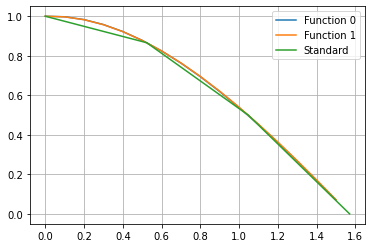

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return math.cos(x)

def process(i, x):
    n = len(x)
    r = [1.0]
    for j in range(n):
        if j != i:
            r.append(x[j])
            r[0] /= x[i] - x[j]
    return r

def lagrange(x):
    n = len(x)
    y = [f(val) for val in x]
    L = []
    for i in range(n):
        li = process(i, x)
        li[0] *= y[i]
        L.append(li)

    return L

def newton(x):
    n = len(x)
    y = [[f(val) for val in x]]
    k = 1
    N = [[y[0][0]]]
    for i in range(n - 1):
        y.append([])
        for j in range(len(y[i]) - 1):
            y[i + 1].append((y[i][j] - y[i][j + 1]) /
                            (x[j] - x[j + k]))
        N.append([y[i+1][0]] + [x[k] for k in range(i + 1)])
        k += 1
    return N

def printer(P):
    operator = False
    for each in P:
        if operator:
            if each[0] < 0:
                print(f'- {abs(each[0]):5.3f}', end=' ')
            else:
                print(f'+ {abs(each[0]):5.3f}', end=' ')
            for i in range(1, len(each)):
                if each[i] > 0:
                    print(f'(x - {each[i]:3.1f})', end=' ')
                else:
                    print(f'(x + {abs(each[i]):3.1f})', end=' ')
        else:
            if each[0] < 0:
                print(f'- {abs(each[0]):5.3f}', end=' ')
            else:
                print(f'{abs(each[0]):5.3f}', end=' ')
            operator = True
    print('\n', end='')

def mm(lst):
    r = 1
    for i in lst:
        r *= i
    return r

def analyse(x, P):
    func = 0
    for each in P:
        func += each[0] * \
                mm(x - each[i] for i in range(1, len(each)))
    return func

def show_plot(limit, x, y, step=0.1):
    X = np.arange(x[0], x[-1], step)
    Y = []
    for i in range(len(limit)):
        Y.append([limit[i](val) for val in X])

    fif, ax = plt.subplots()
    for i in range(len(Y)):
        ax.plot(X, Y[i], label=f'Function {i}')

    ax.plot(x, y, label='Standard')
    ax.legend(loc='upper right')

    ax.grid()

    plt.show()
    
def runge_Romberg(res, true_value):
    k = res[1]['h'] / res[0]['h']
    val_rec = [res[0]['rec'] + (res[0]['rec'] - res[1]['rec']) / (k ** 2 - 1),
               abs(res[0]['rec'] + (res[0]['rec'] - res[1]['rec']) / (k ** 2 - 1) - true_value)]

    val_trp = [res[0]['trp'] + (res[0]['trp'] - res[1]['trp']) / (k ** 2 - 1),
               abs(res[0]['trp'] + (res[0]['trp'] - res[1]['trp']) / (k ** 2 - 1) - true_value)]

    val_smp = [res[0]['smp'] + (res[0]['smp'] - res[1]['smp']) / (k ** 2 - 1),
               abs(res[0]['smp'] + (res[0]['smp'] - res[1]['smp']) / (k ** 2 - 1) - true_value)]
    return {'rec': val_rec, 'trp': val_trp, 'smp': val_smp}


if __name__ == '__main__':
    print('\nЛабораторная работа 3.1\nВариант 2')
    x_1 = [0, math.pi/6, math.pi/3, math.pi/2]
    x_2 = [0, math.pi/6, 5*math.pi/12, math.pi/2]
    x_check = math.pi/4

    print('\nМногочлен Лагранжа')
    L = lagrange(x_1)
    print("L(x) =", end=' ')
    printer(L)

    Lx = analyse(x_check, L)
    print(f'L({x_check}) = {Lx:6.3f}\n')
    
    print('\nМногочлен Лагранжа')
    L = lagrange(x_2)
    print("L(x) =", end=' ')
    printer(L)

    Lx = analyse(x_check, L)
    print(f'L({x_check}) = {Lx:6.3f}\n')

    print('Многочлен Ньютона')
    N = newton(x_1)
    print("N(x) =", end=' ')
    printer(N)

    Nx = analyse(x_check, N)
    print(f'N({x_check}) = {Nx:6.3f}\n')

    print('Функция')
    Fx = f(x_check)
    print(f'F({x_check}) = {Fx:6.3f}\n')

    print('Погрешность')
    print(f'|F(x) - L(x)| = {abs(Fx - Lx):7.4}')
    print(f'|F(x) - N(x)| = {abs(Fx - Nx):7.4}')


    def l(x): return analyse(x, L)
    def n(x): return analyse(x, N)
    show_plot([l, n], x_1, [f(val) for val in x_1])